# 가위, 바위, 보 이미지 분류하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#문제-정의" data-toc-modified-id="문제-정의-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>문제 정의</a></span></li><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 준비</a></span><ul class="toc-item"><li><span><a href="#사이즈-변경하기" data-toc-modified-id="사이즈-변경하기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>사이즈 변경하기</a></span></li><li><span><a href="#데이터-라벨링-하기" data-toc-modified-id="데이터-라벨링-하기-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>데이터 라벨링 하기</a></span></li><li><span><a href="#데이터-시각화" data-toc-modified-id="데이터-시각화-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>데이터 시각화</a></span></li></ul></li><li><span><a href="#모델-구현-및-학습" data-toc-modified-id="모델-구현-및-학습-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>모델 구현 및 학습</a></span></li><li><span><a href="#검증" data-toc-modified-id="검증-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>검증</a></span></li><li><span><a href="#테스트" data-toc-modified-id="테스트-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>테스트</a></span></li><li><span><a href="#튜닝" data-toc-modified-id="튜닝-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>튜닝</a></span><ul class="toc-item"><li><span><a href="#바꿔-볼-수-있는-하이퍼파라미터들" data-toc-modified-id="바꿔-볼-수-있는-하이퍼파라미터들-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>바꿔 볼 수 있는 하이퍼파라미터들</a></span><ul class="toc-item"><li><span><a href="#기본-하이퍼파라미터" data-toc-modified-id="기본-하이퍼파라미터-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>기본 하이퍼파라미터</a></span></li><li><span><a href="#n_channel_1" data-toc-modified-id="n_channel_1-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>n_channel_1</a></span></li><li><span><a href="#n_channel_2" data-toc-modified-id="n_channel_2-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>n_channel_2</a></span></li><li><span><a href="#n_dense" data-toc-modified-id="n_dense-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>n_dense</a></span></li><li><span><a href="#epoch" data-toc-modified-id="epoch-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>epoch</a></span></li></ul></li></ul></li><li><span><a href="#회고" data-toc-modified-id="회고-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>회고</a></span><ul class="toc-item"><li><span><a href="#느낀점" data-toc-modified-id="느낀점-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>느낀점</a></span></li><li><span><a href="#아쉬웠던-점" data-toc-modified-id="아쉬웠던-점-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>아쉬웠던 점</a></span></li></ul></li></ul></div>

## 문제 정의

가위, 바위, 보 이미지 데이터를 사용해서 이미지 속의 가위, 바위, 보를 분류해보자.

## 데이터 준비

구글에 있는 데이터 셋을 사용했다. 데이터는 아래의 링크에서 내려받을 수 있다.

+ train data https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
+ test data https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip

train data는 가위, 바위, 보 각 840개씩 총 2520개, test data는 각 124개씩 총 372개의 이미지 파일로 구성되어 있다.

이미지 파일의 크기는 300x300이다.

In [2]:
from PIL import Image
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### 사이즈 변경하기

먼저, 가위의 이미지를 불러와서 이미지의 사이즈를 28x28로 변경해준다

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB') # Pillow 라이브러리를 이용하여 RGB 로 다시 저장해준다.
    new_img.save(img,"png")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac28/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


마찬가지로 바위와 보도 데이터를 28x28 사이즈로 다듬어준다.

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png") 

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB') # Pillow 라이브러리를 이용하여 RGB 로 다시 저장해준다.
    new_img.save(img,"png")
    
print("바위 이미지 resize 완료!")



# 보 이미지가 저장된 디렉토리 아래의 모든 png 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png") 

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB') # Pillow 라이브러리를 이용하여 RGB 로 다시 저장해준다.
    new_img.save(img,"png")
    
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac28/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac28/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


### 데이터 라벨링 하기

입력으로 이미지가 있는 폴더 위치를 받는 함수를 만들어 3개의 클래스를 만들어 각 이미지 데이터에 라벨을 붙여준다.

가위 : 0, 바위 : 1, 보 : 2로 라벨링된다.

In [7]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2520   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3 # 흑백 이미지의 경우 1, 컬러 이미지의 경우 3을 넣어준다.
    
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2520 입니다.
x_train shape: (2520, 28, 28, 3)
y_train shape: (2520,)


> glob 모듈

glob 모듈은 유닉스 셸이 사용하는 규칙에 따라 지정된 패턴과 일치하는 모든 경로명을 찾습니다. 하지만 결과는 임의의 순서로 반환됩니다. 물결표(tilde) 확장은 수행되지 않지만, \*, ? 및 []로 표시되는 문자 범위는 올바르게 일치합니다.

이는 서브 셸을 실제로 호출하지 않고 os.scandir() 과 fnmatch.fnmatch() 함수를 사용하여 수행됩니다. fnmatch.fnmatch()와 달리, glob은 점(.)으로 시작하는 파일 이름을 특수한 경우로 취급합니다. (물결표와 셸 변수 확장은 os.path.expanduser() 와 os.path.expandvars()를 사용하십시오.)

+ https://docs.python.org/ko/3/library/glob.html

In [6]:
# glob은 단순히 경로를 지정하는 것이 아니라 이터레이터로 만들어서 반환해준다.
glob.iglob(os.getenv("HOME") + "/aiffel/rock_scissor_paper"+'/scissor/*.png')

<generator object _iglob at 0x7f6c99b7b050>

### 데이터 시각화

다듬은 이미지 데이터를 시각화해서 이미지를 확인해보자!

라벨:  0


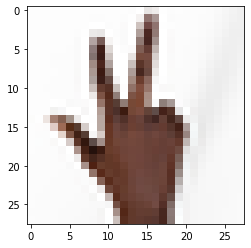

In [12]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

인덱스를 바꿔가며 확인해 본 결과, 라벨이 알맞게 붙은 것을 확인할 수 있다.

## 모델 구현 및 학습

In [14]:
# 모델을 구현해보자.
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) # 흑백 이미지와는 달리 RGB가 3이므로 1이 아니라 3을 넣어준다.
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

총 7개의 layer를 가지고 있다.

In [15]:
# 모델 학습하기
# model.compile()과 model.fit()을 사용해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10) # epoch는 10으로 지정해줬다.

Epoch 1/10
79/79 [==============================] - 3s 41ms/step - loss: 0.8089 - accuracy: 0.6619
Epoch 2/10
79/79 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.9377
Epoch 3/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9837
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9940
Epoch 5/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.9984
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9996
Epoch 7/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 10/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000


## 검증

검증하기 위해 먼저 test data 또한 train data와 마찬가지로 데이터를 다듬어준다.

In [16]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# 가위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor" # 테스트 데이터의 경로를 지정해준다.
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB')
    new_img.save(img,"png")

print("테스트 가위 이미지 resize 완료!")


# 바위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png") 

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB')
    new_img.save(img,"png")
    
print("테스트 바위 이미지 resize 완료!")


# 보
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png") 

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB')
    new_img.save(img,"png")
    
print("테스트 보 이미지 resize 완료!")



# 마찬가지로 test data에도 라벨링을 해준다.
def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=372   # 테스트 데이터의 총 개수
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

이미지 디렉토리 경로:  /home/ssac28/aiffel/rock_scissor_paper/test/scissor
테스트 가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac28/aiffel/rock_scissor_paper/test/rock
테스트 바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac28/aiffel/rock_scissor_paper/test/paper
테스트 보 이미지 resize 완료!
테스트 데이터(x_test)의 이미지 개수는 372 입니다.
x_test shape: (372, 28, 28, 3)
y_test shape: (372,)


## 테스트


In [20]:
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 0.5109 - accuracy: 0.8683
test_loss: 0.5108973979949951 
test_accuracy: 0.8682795763015747


## 튜닝

+ 하이퍼파라미터들을 바꿔가며 결과 변화를 확인해보자!

In [46]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_55 (Dense)             (None, 3)               

### 바꿔 볼 수 있는 하이퍼파라미터들

+ n_channel_1=16
+ n_channel_2=32
+ n_dense=32
+ n_train_epoch=10

#### 기본 하이퍼파라미터

1. loss: 2.4653 - accuracy: 0.7016
2. loss: 2.9104 - accuracy: 0.6075
3. loss: 1.2956 - accuracy: 0.7688
4. loss: 3.5502 - accuracy: 0.6667
5. loss: 2.6038 - accuracy: 0.6505

#### n_channel_1

+ 32

1. loss: 1.1501 - accuracy: 0.7849
2. loss: 1.2983 - accuracy: 0.6828
3. loss: 1.7173 - accuracy: 0.7177
4. loss: 1.9886 - accuracy: 0.6505
5. loss: 1.3817 - accuracy: 0.7742

#### n_channel_2

+ 64

1. loss: 1.1552 - accuracy: 0.7742
2. loss: 1.2760 - accuracy: 0.7231
3. loss: 1.5159 - accuracy: 0.7124
4. loss: 1.6436 - accuracy: 0.7016
5. loss: 0.5635 - accuracy: 0.7823

#### n_dense

+ 64

1. loss: 1.6151 - accuracy: 0.7527
2. loss: 1.7346 - accuracy: 0.7366
3. loss: 1.2115 - accuracy: 0.6989
4. loss: 3.0429 - accuracy: 0.5995
5. loss: 0.7592 - accuracy: 0.7930

#### epoch

+ 20

1. loss: 1.1060 - accuracy: 0.8495
2. loss: 3.9921 - accuracy: 0.5618
3. loss: 1.0795 - accuracy: 0.7930
4. loss: 1.0793 - accuracy: 0.7661
5. loss: 1.5998 - accuracy: 0.6989

하이퍼파라미터 4개를 하나씩 변경해서 5번씩 실행했다.

횟수가 적어 정확하다고 할 수는 없지만, **n_channel_2**을 제외하고는 유의미한 변화를 느끼기는 힘들었다.

## 회고

### 느낀점

+ 직접 데이터를 만들어도 보고, 딥러닝 모델을 만들어 하이퍼파라미터를 하나씩 바꿔가며 결과를 비교해보는 것은 정말로 특별한 경험이었다.
+ 단순히 복사, 붙여넣기가 아닌 직접 코드를 하나씩 쳐보며 음미했다. ~~*맛있다*~~
+ 몰랐던, 막혔던 부분을 검색해가며 스스로 해결했을 때의 그 쾌감. 이 것 때문에 여기에 빠졌는지도 모르겠다.

### 아쉬웠던 점

+ 데이터
    - 직접 만든 데이터로 모델을 실행했을 때 생각보다 결과가 좋지 않았다.
    - 이미지 분류에서 데이터의 질이 얼마나 중요한지 다시 한번 느끼게 되었다.
+ 모델
    - 직접 모델을 만들어보고 했지만 사실 잘 모른다.
    - 이 하이퍼파라미터가 어디에 어떤 영향을 미치는지, 또 레이어가 몇 개가 더 필요한지, 최적의 파라미터는 무엇인지
    - 많은 공부가 필요하다고 느꼈다.
    
다음에는 더 성장하길!!!